# Least squres regression with regularization

Main point: to reduce the influences of outliers

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
d = h5py.File('rls-data.h5', 'r')
X = d['x'][:]
Y = d['y'][:]

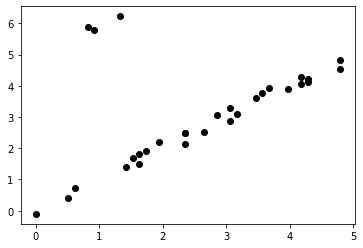

In [3]:
plt.plot(X,Y,'ko')

In [4]:
# least square fitting

In [5]:
np.vstack((X, np.ones(X.shape)))

array([[0.        , 0.51020408, 0.6122449 , 0.81632653, 0.91836735,
        1.32653061, 1.42857143, 1.53061224, 1.63265306, 1.63265306,
        1.73469388, 1.93877551, 2.34693878, 2.34693878, 2.34693878,
        2.65306122, 2.85714286, 3.06122449, 3.06122449, 3.16326531,
        3.46938776, 3.57142857, 3.67346939, 3.97959184, 4.18367347,
        4.18367347, 4.28571429, 4.28571429, 4.79591837, 4.79591837],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

In [6]:
A = np.vstack((X, np.ones(X.shape))).T
A

array([[0.        , 1.        ],
       [0.51020408, 1.        ],
       [0.6122449 , 1.        ],
       [0.81632653, 1.        ],
       [0.91836735, 1.        ],
       [1.32653061, 1.        ],
       [1.42857143, 1.        ],
       [1.53061224, 1.        ],
       [1.63265306, 1.        ],
       [1.63265306, 1.        ],
       [1.73469388, 1.        ],
       [1.93877551, 1.        ],
       [2.34693878, 1.        ],
       [2.34693878, 1.        ],
       [2.34693878, 1.        ],
       [2.65306122, 1.        ],
       [2.85714286, 1.        ],
       [3.06122449, 1.        ],
       [3.06122449, 1.        ],
       [3.16326531, 1.        ],
       [3.46938776, 1.        ],
       [3.57142857, 1.        ],
       [3.67346939, 1.        ],
       [3.97959184, 1.        ],
       [4.18367347, 1.        ],
       [4.18367347, 1.        ],
       [4.28571429, 1.        ],
       [4.28571429, 1.        ],
       [4.79591837, 1.        ],
       [4.79591837, 1.        ]])

In [7]:
np.linalg.lstsq(A, Y, rcond=None)

(array([0.56254629, 1.64155068]),
 array([55.95615884]),
 2,
 array([16.63842323,  2.42711812]))

In [8]:
theta = np.linalg.lstsq(A, Y, rcond=None)[0]

In [9]:
theta

array([0.56254629, 1.64155068])

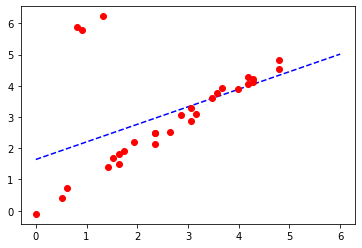

In [10]:
xp = np.linspace(0, 6, 3)
plt.plot(xp, theta[0]*xp + theta[1], 'b--')
plt.plot(X,Y,'ro')

In [11]:
# regularized least squares

In [12]:
len(X), len(Y)

(30, 30)

In [13]:
import scipy.sparse.linalg as sla

In [14]:
theta2 = sla.lsmr(A, Y, damp=5)[0]

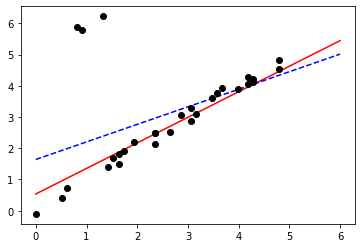

In [15]:
plt.plot(xp, theta2[0]*xp + theta2[1], 'r-')
plt.plot(xp, theta[0]*xp + theta[1], 'b--')
plt.plot(X, Y, 'ko')

In [16]:
# excluding the outliers

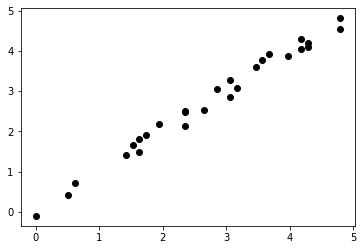

In [17]:
idx = Y < 5
x3 = X[idx]
y3 = Y[idx]
plt.plot(x3,y3,'ko')

In [18]:
A3 = np.vstack((x3, np.ones(x3.shape))).T
theta3 = np.linalg.lstsq(A3, y3, rcond=None)[0]

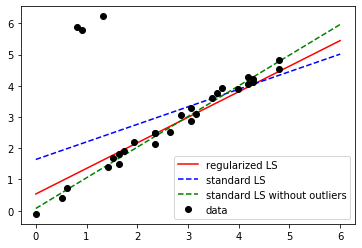

In [19]:
plt.plot(xp, theta2[0]*xp + theta2[1], 'r-', label='regularized LS')
plt.plot(xp, theta[0]*xp + theta[1], 'b--', label='standard LS')
plt.plot(xp, theta3[0]*xp + theta3[1], 'g--', label='standard LS without outliers') 
plt.plot(X, Y, 'ko', label='data')
plt.legend()

In [20]:
# interactive plot

In [21]:
from ipywidgets import interactive, fixed

In [22]:
def rlq(d, At, Yt):
    theta = sla.lsmr(At, Yt, damp=d)[0]
    plt.plot(xp, theta[0]*xp + theta[1], 'r--', label='RLS')
    plt.plot(X, Y, 'ko', label='data')
    plt.text(4, 2, 'd={}'.format(d))
    plt.legend(loc='lower right')
    
interactive(rlq, d=(0,20), At=fixed(A), Yt=fixed(Y))

interactive(children=(IntSlider(value=10, description='d', max=20), Output()), _dom_classes=('widget-interact'…